## Задачи регрессии и классификации

## Содержание

#### Метрические методы классификации 
   * Определение расстояний между объектами
   * Обобщенный метрический классификатор


#### Параметрические методы восстановления плотности
* Задача восстановления плотности распределения
* Восстановление многомерной гауссовой плотности
* Разделение смеси распределений

## Постановка задачи машинного обучения


$X \space-$  множество объектов

$Y \space-$  множество ответов

$y : X → Y \space-$ целевая функция

$X^\ell = \{(x_1, y_1), \ldots, (x_\ell, y_\ell)\} \space-$  обучающая выборка

$a : X → Y \space-$ алгоритм, решающая функция, приближающая значения целевой функции на множестве X

<b>Модель алгоритма</b> $-$ параметрическое семество функций  $A = \{a(x, \theta) | \theta \in \Theta \} $


<b>Функция потерь (loss function)</b> $L(a(x), y) \space -$ величина ошибки алгоритма $a \in A$ на объекте $x \in X$ 

<b>Эмпирический риск</b> $-$ функционал качества алгоритма a на обучающей выборке $X^\ell$:

$$Q(a, X^{\ell}) = \frac{1}{\ell} \sum_{i=1}^{\ell} L(a(x_i),y_i)$$

<b>Метод обучения -  минимизация эмпирического риска</b>:

$$a= \mu(X^\ell) = \operatorname*{argmin}_{a \in A} Q(a, X^{\ell})$$


## Гипотезы непрерывности и компактности

<b>Гипотеза непрерывности (для регрессии):</b> близким объектам сооствествуют близкие ответы. 


<b>Гипотеза компактности (для классификации): </b> близкие объекты как правило лежат в одном классе. 




In [187]:
def plot_blob(): 
    from sklearn.datasets import make_blobs
    X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.4, random_state=0)
    y = y.astype(bool)
    plt.scatter(X[y,0], X[y,1])
    plt.scatter(X[~y,0], X[~y,1])

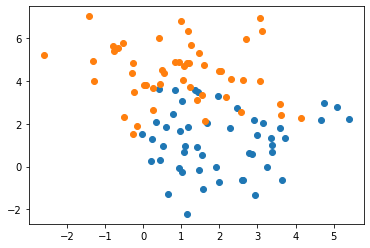

In [188]:
plot_blob()

## Формализация понятия близости

Евклидова метрика и обобщенная метрика Миньковского:


$$\rho (x, x_i) = ( \sum_{j=1}^{n}|x^j - x_i^j|^2 )^\frac{1}{2}$$


$$\rho (x, x_i) = ( \sum_{j=1}^{n}w_j|x^j - x_i^j|^p )^\frac{1}{p}$$

$x = (x^1,\dots, x^n) - $ вектор признаков объекта $x$

$x_i = (x_i^n, \dots, x_i^n) - $ вектор признаков оъекта $x_i$

$w = (w_i, \dots, w_n) - $ веса признаков, которые можно обучать.



## Эквидистантные поверхности при различных p

In [66]:
from scipy.spatial.distance import minkowski
import numpy as np
import matplotlib.pyplot as plt

def plot_minkowski():
    fig = plt.figure(figsize=(7, 4))
    x = np.arange(-1, 1, 1e-5)
    fig, axs = plt.subplots(figsize=(16, 4), ncols=4)

    for i, p in enumerate([0.5, 1, 2, 5]): 
        y = (1 - abs(x)**p)**(1/p) 
        axs[i].plot(np.hstack([x, -x]), np.hstack([-y,y]), label=f'p={p}')
        axs[i].grid()
        axs[i].legend()
    

<Figure size 504x288 with 0 Axes>

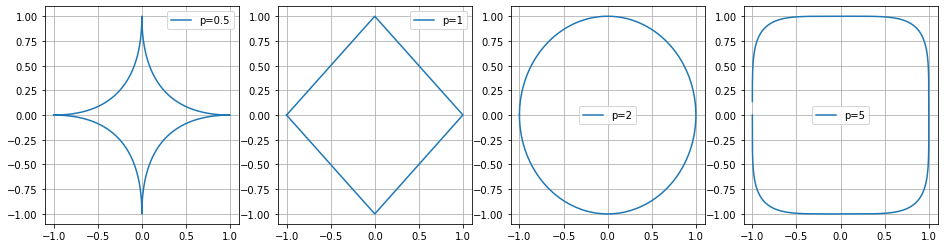

In [67]:
plot_minkowski()

## Расстояние между объектами

<b>Расстояния между строками:</b>

   * расстояние левенштейна - минимальное количество односимвольных операций (вставки, удаления, замены), необходимых для превращения одной последовательности символов в другую. 
   * косинусная мера  $\rho(x,y) = \frac{\langle x, y \rangle}{||x|| ||y||}$, где $x_i = \frac{c_i}{\sum c_j}$ - частота слова $с_i$ в документе

<b>Расстояние между сигналами:</b> $\rho(x,y) = \sqrt {\int_{a}^{b} (x(t)-y(t))^2 dt}$

<b>Расстояние между изображениями:</b> норма Фробениуса $\rho(x,y) = \sqrt {\sum_{i,j=1}^{m,n}|x_{i,j}-y_{i,j}|^2}$

## Проклятье размерности

In [185]:
def plot_curse(): 
    from sklearn.datasets import make_blobs
    X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.4, random_state=0)
    y = y.astype(bool)

    plt.scatter(X[y,0], X[y,1])
    plt.scatter(X[~y,0], X[~y,1])
    plt.scatter(X[y,0].mean(), X[y,1].mean(), s=120, c='blue')
    plt.scatter(X[~y,0].mean(), X[~y,1].mean(),s=120,  c='orange')
    plt.plot([X[y,0].mean(), X[~y,0].mean()] , [X[y,1].mean(), X[~y,1].mean()], c='blue')
    plt.plot([X[y,0].mean(), X[1,0]] , [X[y,1].mean(), X[1,1]], c='green')
    

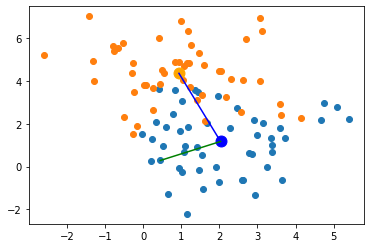

In [186]:
plot_curse() 

In [173]:
distances = []
for i in range(100):
    X = np.c_[X, np.random.normal(0, 1, 100)]
    distances.append(
        sum(abs(X[y] - X[y].mean(axis=0)).mean(axis=0)**2)/
        sum(abs(X[y].mean(axis=0) - X[~y].mean(axis=0))**2))

C увеличение количества неинформативных признаков шумовая составяющая будет вносить решающую роль в метрику близости объектов. 

Зависимость отношения стандартного отклонения объекта первого класса от своей центроиды к расстоянию между центроидами кластеров с ростом количества признаков: 

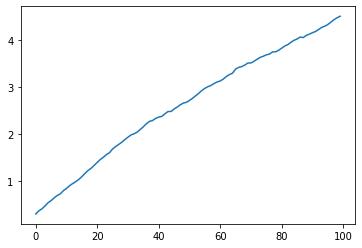

In [174]:
plt.plot(range(100), distances)

## Обобщенный метрический классификатор

Для произвольного $x \in X$ отранжируем объекты обучающей выборки $x_1,\dots, x_\ell$:
$$ \rho(x,x^{(1)}) \le \rho(x,x^{(2)}) \le \dots \le \rho(x, x^{(\ell)}) $$

$x^{(i)} - $ i-й сосед объекта х среди $x_1, \dots, x_\ell $

$y^{(i)} - $ ответ на i-м соседе объекта х

<b>Метрический алгоритм классификации:</b>

$$a(x; X^\ell) = \operatorname*{argmax}_{y \in Y} \sum_{i=1}^\ell [y^{(i)} = y] w(i,x)$$

$w(i, x) -$ вес (степень важности) i-го соседа объекта x

$\sum_{i=1}^\ell [y^{(i)} = y] w(i,x) - $ оценка близости объекта x к классу y 

## Метод k-ближайших соседей

$$a(x; X^\ell) = \operatorname*{argmax}_{y \in Y} \sum_{i=1}^\ell [y^{(i)} = y] w(i,x)$$

$w(i,x) = [i \le 1] -$ метод ближайшего соседа 

$w(i,x) = [i \le k] -$ метод k ближайших соседей

Преимущества: 

* простота реализации (lazy learning)
* параметр k можно оптимизировать leave-one-out: $$LOO(k, X^\ell) = \sum_{i=1}^\ell[a(x_i; X^\ell \backslash {x_i}, k) \ne y_i] → \operatorname*{min}_k $$

Недостатки:
* возможна неоднозначность классификации при четном k
* не учитываются расстояния до объектов

## Метод k взвешенных соседей

$w(i,x) = [i \le k] w_i$ 

где $w_i -$ вес, зависящий только от номера соседа

Возможные эвристики:

$w_i = \frac{k+1-i}{k} - $ линейное убывание весов


$w_i = q^i - $  экспоненциальное убывание весов

Проблемы: 
* как обоснованно задать веса 
* возможно, было бы лучше, если бы вес $w(i,x)$ зависел не от позиции в вариационном ряду, а от расстояния до него $\rho(x, x^{(i)})$



In [74]:
def plot_weight():
    fig = plt.figure(figsize=(7, 4))
    i = np.arange(1, 10)
    k = 10
    w1 = (k + 1 - i)/k
    w2 = 0.7**i
    
    plt.plot(i, w1,  label='Линейное убывание весов. k=10')
    plt.plot(i, w2,  label='Экспоненциальное убывание весов')
    plt.grid()
    fig.legend()


## Убывание веса объекта 

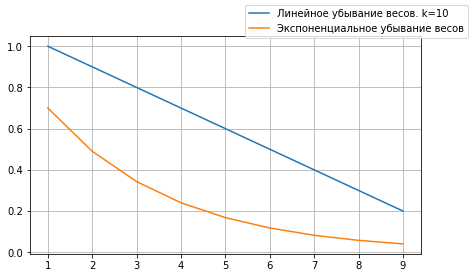

In [75]:
plot_weight()

## Метод окна Парзена

$$w(i, x) = K ( \frac{\rho(x,x^{i})} {h} ) $$

$h - $ где h - ширина окна, 

$K(r) - $ ядро, не возрастает и положительно на [0,1]

<b>Метод парезеновского окна фиксированной ширины: </b>

$$a(x; X^\ell) = \operatorname*{argmax}_{y \in Y} \sum_{i=1}^\ell [y^{(i)} = y] K ( \frac{h}{\rho(x,x^{i})}) $$


<b>Метод парезеновского окна переменной ширины: </b>

$$a(x; X^\ell) = \operatorname*{argmax}_{y \in Y} \sum_{i=1}^\ell [y^{(i)} = y] K ( \frac{\rho(x,x^{k+1})}{\rho(x,x^{i})}  ) $$

Гиперпараметры модели:
* ширина окна h и число соседей k
* выбор ядра K


## Метод потенциальных функций


$$w(i, x) = q^{(i)} K ( \frac{1}{\rho(x,x^{i})})$$

$ q^{(i)} -$ вес объектов, $\gamma \ge 0$

$$a(x; X^\ell) = \operatorname*{argmax}_{y \in Y} \sum_{i=1}^\ell [y^{(i)} = y] q^{(i)} K ( \frac{1}{\rho(x,x^{i})^2} ) $$

<b>Физическая аналогия из электростатики: </b>

$ q^{(i)} -$ величина "заряда" в точке $x_i$

$E(x, x_i) = q^{(i)}K(x, x_i) = \frac{q^{(i)}k}{\rho(x,x^{(i)})^2} - $  напряженность поля в точке x, создаваемая зарядом $q^{i}$

$y_i$ - знак "заряда" (в случае двух классов $y = \{-1, +1\}$

## Метод потенциальных функций и линейный классификатор

Для задачи бинарной классификации  $y = \{-1, +1\}$
$$a(x; X^\ell) = sign \sum_{i=1}^\ell y^{(i)} q^{(i)} K ( \frac{k}{\rho(x,x^{i})^2} ) $$

Сравним с линейной моделью классификации:

$$a(x) = sign \sum_{j=1}^n q^{(j)} f_j(x) $$


$f_j(x) = y^{(j)} K ( \frac{k}{\rho(x,x^{j})^2} ) - $ новые признаки объекта x

$ q^{(i)} - $ веса линейного классификатора

$n = \ell$ - число признаков равно числу обхектов в обучающей выборке

## Профиль компактности

Профиль компактности выборки $X^\ell$ - это функция доли объектов $x_i$ у которых m-й сосед $x_i^{m}$ лежит в другом классе: 

$$K(m, X^\ell) = \frac{1}{L}\sum_{i=1}^{\ell}[y_i \ne y_i^{(m)}] $$

где $x_i^{(m)}$ - m-й сосед объекта $x_i$ среди $X^{\ell}$

$y_i^{(m)} - $ ответ на m-ом соседе объекта $x_i$

## Метрический подход к регрессионной задаче, формула Надарая-Ватсона

$Y = \mathbb{R} \space -$ задача регрессии

$$a(x) = \frac {\sum_{i=1}^{\ell} y_i w_i(x)} {\sum_{i=1}^{\ell} w_i(x)}=  \frac{ \sum_{i=1}^{\ell} y_i K( \frac{\rho(x,x^{i})}{h})}{ \sum_{i=1}^{\ell} K( \frac{\rho(x,x^{i})}{h})} $$



## Часто используемые ядра K(r)

$П(r) = [|r| \le 1] - $ прямоугольное

$T(r) = (1 - |r|)[|r| \le 1] - $ треугольное

$Q(r) = (1 - r^2)^2[|r| \le 1] - $ квадратичное

$G(r) = e^{-2r^2}  - $ гауссовое

In [90]:
def plot_kernels():
    fig = plt.figure(figsize=(7, 4))
    r = np.arange(-2, 2, 0.01)
    
    p = abs(r) <= 1 
    t = (1 - abs(r))*p
    q = (1 - r**2)**2*p
    g = np.e**(-2*r**2)
    
    plt.plot(r, p,  label='Прямоугольное')
    plt.plot(r, t,  label='Треугльное')
    plt.plot(r, q,  label='Квадратичное')
    plt.plot(r, g,  label='Гауссовское')
    plt.grid()
    fig.legend()


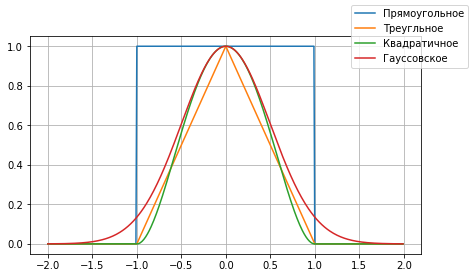

In [91]:
plot_kernels()

## Метод поиска ближайших соседей

Если просто перебирать все объекты обучающей выборки, выбирая наиболее близкий к новому объекту, то получаем сложность $O(\ell k)$

* kd-tree (k-мерное дерево) - особый вид двоичных деревьев поиска
* locality-sensitive hashing (LSH) - hash-функция, близкие объекты имеют похожие хэши

In [96]:
import numpy as np
from matplotlib import pyplot as plt


class KDTree:
    """Simple KD tree class"""

    def __init__(self, data, mins, maxs):
        self.data = np.asarray(data)


        assert self.data.shape[1] == 2

        if mins is None:
            mins = data.min(0)
        if maxs is None:
            maxs = data.max(0)

        self.mins = np.asarray(mins)
        self.maxs = np.asarray(maxs)
        self.sizes = self.maxs - self.mins

        self.child1 = None
        self.child2 = None

        if len(data) > 1:
            # sort on the dimension with the largest spread
            largest_dim = np.argmax(self.sizes)
            i_sort = np.argsort(self.data[:, largest_dim])
            self.data[:] = self.data[i_sort, :]

            # find split point
            N = self.data.shape[0]
            half_N = int(N / 2)
            split_point = 0.5 * (self.data[half_N, largest_dim]
                                 + self.data[half_N - 1, largest_dim])

            # create subnodes
            mins1 = self.mins.copy()
            mins1[largest_dim] = split_point
            maxs2 = self.maxs.copy()
            maxs2[largest_dim] = split_point

            # Recursively build a KD-tree on each sub-node
            self.child1 = KDTree(self.data[half_N:], mins1, self.maxs)
            self.child2 = KDTree(self.data[:half_N], self.mins, maxs2)

    def draw_rectangle(self, ax, depth=None):
        """Recursively plot a visualization of the KD tree region"""
        if depth == 0:
            rect = plt.Rectangle(self.mins, *self.sizes, ec='k', fc='none')
            ax.add_patch(rect)

        if self.child1 is not None:
            if depth is None:
                self.child1.draw_rectangle(ax)
                self.child2.draw_rectangle(ax)
            elif depth > 0:
                self.child1.draw_rectangle(ax, depth - 1)
                self.child2.draw_rectangle(ax, depth - 1)

In [108]:
def plot_kdtree():
    np.random.seed(2)

    X = np.random.random((30, 2)) * 2 - 1
    X[:, 1] *= 0.1
    X[:, 1] += X[:, 0] ** 2


    KDT = KDTree(X, [-1.1, -0.1], [1.1, 1.1])


    fig = plt.figure(figsize=(5, 5))
    fig.subplots_adjust(wspace=0.1, hspace=0.15,
                        left=0.1, right=0.9,
                        bottom=0.05, top=0.9)

    for level in range(1, 5):
        ax = fig.add_subplot(2, 2, level, xticks=[], yticks=[])
        ax.scatter(X[:, 0], X[:, 1], s=9)
        ax.scatter(X[:10, 0], X[:10, 1], s=9,color='r')
        # ax.scatter(X[-5:, 0], X[-5:, 1], s=9,color='r')
        KDT.draw_rectangle(ax, depth=level - 1)

        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-0.15, 1.15)
        ax.set_title('level %i' % level)


    fig.suptitle('$k$d-tree Example')
    plt.show()

## KD-tree

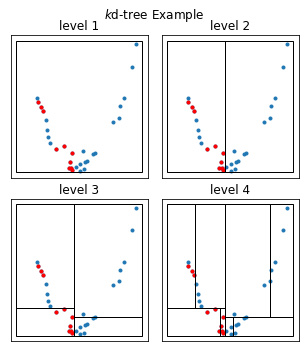

In [109]:
plot_kdtree()

Для приближённого поиска можно перебирать только объекты в листе

Можно построить несколько деревьев со случайными разбиениями признакового пространства на подпространства

## Резюме 

Плюсы:  
+ Легко реализуемы
+ Легко интерпретируемы
+ Мало гиперпараметров:
 * число ближайших соседей k или ширину окна h
 * веса объектов 
 * набор эталонов

Минусы: 

*  сложность классификации зависит от объёма обучающей выборки

*  требуется хранение всей обучающей выборки

*  требует тщательного подбора метрики



## Смеси распределений 

$p(x)$ является смесью распределений если
$$
    p(x)
    =
    \sum_{k = 1}^{K} \pi_k p_k(x|\theta_k),
    \qquad
    \sum_{k = 1}^{K} \pi_k = 1,
    \qquad
    \pi_k \geq 0,
$$ 

где $p_k(x|\theta_k)  - $ распределение компоненты смеси,

$\pi_k = P(k)  -$ априорные вероятности компонент,

$K -$ число компонент.

Будем считать, что распределения компонент смеси принадлежат
некоторому параметрическому семейству: $p_k(x) = \phi(x | \theta_k)$.

In [255]:
def plot_mixt():
    import pandas as pd

    p = np.random.normal(0, 1, 3000)
    q = np.random.normal(3, 1, 7000)

    pd.DataFrame(np.hstack([p,q]), columns=['0.3N(0,1)+0.7N(3,1)']).plot(kind='kde', title=f'Смесь нормальных распределений')

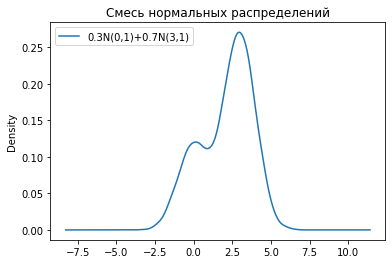

In [256]:
plot_mixt()

###  Задача восстановления смеси распределений

$$
    p(x)
    =
    \sum_{k = 1}^{K} \pi_k p_k(x),
    \qquad
    \sum_{k = 1}^{K} \pi_k = 1,
    \qquad
    \pi_k \geq 0,
$$ 


Задача при фиксированном $K$,

имея простую (i. i. d.) выборку $X^\ell = \{x_1, \dots, x_\ell\} \sim p(x)$

оценить вектор  параметров $(\pi, \theta) = (\pi_1, \dots, \pi_k, \theta_1, \dots, \theta_k)$


## Максимизация правдоподобия выборки и EM-алгоритм

$$
    \log p(X | \pi, \theta)
    =   \log П_{i = 1}^{\ell} p(x_i | \pi, \theta)
         = 
    \sum_{i = 1}^{\ell}
        \log \Biggl\{
            \sum_{k = 1}^{K} \pi_k p(x_i | \theta_k)
        \Biggr\}   → \operatorname*{max}_{\theta, \pi}
$$
При ограничениях на веса
    $\sum_{k = 1}^{K} \pi_k = 1,
    \pi_k \geq 0$
    
 <b>Итерационный алгоритм Expectaition-Maximization</b>
 
Начальное приближение параметров $(\theta, \pi)$

<b>Повторять</b> 

Оценка срытых переменных $Z=(z_{i,j}) , z_{i,j} = P(j|x_i)$

$Z =$ E-шаг$(\theta, \pi)$

Максимизация правдоподобия отдельно по компонентам:

$(\theta, \pi)$ = M-шаг($\theta, \pi, Z$)

<b>Пока $\theta, \pi, Z$ не стабилизируются</b> 

## Вероятностная интерпретация


<b> E-шаг - это формула Байеса </b>

$$z_{i,j} = P(j|x_i) = \frac{P(j)p(x_i|j)}{p(x_i)} = \frac{\pi_j p(x_i|\theta_j)}{p(x_i)} = \frac{\pi_j p(x_i|\theta_j)}{\sum_{k = 1}^{K} \pi_k p(x|\theta_k)}  $$ 


<b>М-шаг - максимизация взвешенного правдоподобия с весами объектов $z_{i,j}$ для j-й компоненты смеси</b>

$$ \theta_j = \operatorname*{argmax}_\theta     \sum_{i = 1}^{\ell}
         z_{i,j} \log  p(x_i | \theta_k) $$


$$ \pi_j = \frac{1}{\ell}  \sum_{i = 1}^{\ell}  z_{i,j} $$


## EM-алгоритм

вход: X^ell = {x_1, \dots, x_\ell}, K
выход: $(\theta_j, \pi_j)_{j=1}^K - $ параметры смеси распределений
 
Начальное приближение параметров $(\theta_j)_{j=1}^K  , \pi_j= \frac{1}{K}$

<b>Повторять</b> 


E-шаг (expectation): для всех $i=1,\dots, \ell, j=1,\dots, k$


$$z_{i,j} = \frac{\pi_j p(x_i|\theta_j)}{\sum_{k = 1}^{K} \pi_k p(x|\theta_k)}  $$ 


M-шаг  (maximization): $j=1,\dots, k$


$$ \theta_j = \operatorname*{argmax}_\theta     \sum_{i = 1}^{\ell}
         z_{i,j} \log  p(x_i | \theta_k) $$


$$ \pi_j = \frac{1}{\ell}  \sum_{i = 1}^{\ell}  z_{i,j} $$

<b>Пока $\theta, \pi, Z$ не стабилизируются</b> 

## Дивергенция Кульбака-Лейблера

Мера "различия" распределений $p$ и $q$: 
$$
KL(p \| q) = \int p(z) \log \frac{p(z)}{q(z)} dz = \sum_{z \in Z} P(z) \log \frac{P(z)}{Q(z)}
$$
где Z - множество полученное дискритизацией значений непрерывной случайной величины

In [245]:
def plot_kl():
    import pandas as pd

    p = np.random.normal(0, 1, 10000)
    q = np.random.normal(0.5, 1, 10000)
    n = 20

    _, bins = pd.qcut(p, q=n, retbins=True)
    bins[0], bins[-1] = -np.inf, np.inf 

    result = pd.cut(q, bins).value_counts()/q.shape[0]

    kl = sum(1/n * np.log(1/(result*n)))
    pd.DataFrame(np.c_[p,q], columns=['p', 'q']).plot(kind='kde', title=f'KL(p|q)= {kl:.3}')

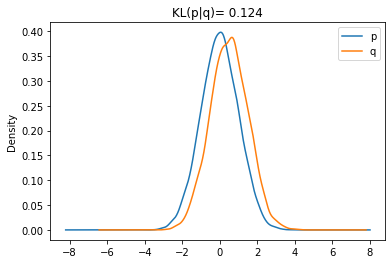

In [246]:
plot_kl()